![](https://i0.wp.com/cimtrajalisco.org/wp-content/uploads/2019/02/Logo_Horizontal-1024x472.jpg?fit=1024%2C472)

# <center>Portafolio de inversión de empresas de construcción</center>

# <center>Jose Manuel Ramirez Araiza 747818 jose.ramireza@iteso.mx</center>
# <center>Jose Armando Borregui Vidrio 727516 im727516@iteso.mx</center>
# <center>Jonathan Misael Valencia Guerra 745950 jonathan.valencia@iteso.mx</center>

# <center>23 de octubre del 2023</center>


## Objetivo general:
Desarrollar un portafolio de inversión basado en simulación matemática, que analice las inversiones en cuatro empresas del sector de construcción de viviendas y centros comerciales, evaluando su rendimiento diario a través de una función de rendimiento y analizando los ingresos generados a partir de las acciones en empresas extranjeras.
## Objetivos específicos:
>- Análisis de Empresas: Investigar y analizar el desempeño histórico de las cuatro empresas del sector de construcción de viviendas y centros comerciales, identificando patrones y tendencias que ayuden a tomar decisiones informadas.
>- Selección de Empresas Extranjeras: Identificar y seleccionar empresas extranjeras en las que invertir, considerando su estabilidad financiera, proyecciones de crecimiento y relevancia en el mercado internacional, para diversificar el portafolio y aumentar el potencial de ingresos.
>- Desarrollo de la Función de Rendimiento: Evaluar la función de rendimiento que muestre el desempeño diario de cada empresa en el portafolio, utilizando indicadores financieros relevantes y datos históricos, permitiendo así una evaluación precisa del rendimiento de las inversiones.
>- Simulación: Implementar simulaciones matemáticas para evaluar diferentes escenarios de inversión, optimizando la distribución del capital entre las empresas y las acciones extranjeras.
>- Visualización del Portafolio: Crear visualizaciones utilizando herramientas disponibles en Jupyter para representar el rendimiento diario de cada empresa y las fluctuaciones del portafolio en tiempo real, facilitando la comprensión de los resultados obtenidos.



## Modelo que representa el problema
Función de rendimiento diario:
$$ R = \frac{{\text{{data}} - \text{{data}}.shift()}}{{\text{{data}}.shift()}}$$

Media: $$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$
Desviación estándar: $$ \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2} $$

## Solución del problema de optimización

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [9]:
def getClose(name, start, end):
    return yf.download(name, start, end)["Adj Close"]

<Axes: ylabel='Frequency'>

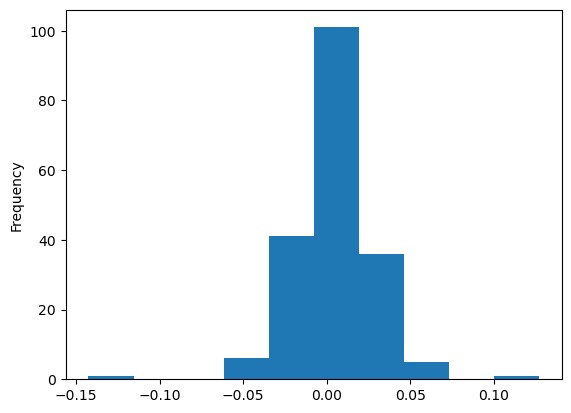

In [11]:
R = (data-data.shift())/data.shift()
R.plot.hist()

In [12]:
R.mean()#Media

0.0038360346820688327

In [13]:
R.describe() 

count    191.000000
mean       0.003836
std        0.024758
min       -0.142560
25%       -0.007832
50%        0.004702
75%        0.016850
max        0.127200
Name: Adj Close, dtype: float64

In [14]:
R.std() #Desviación estándar

0.024758023123073045

In [15]:
R.count()

191

<Axes: ylabel='Frequency'>

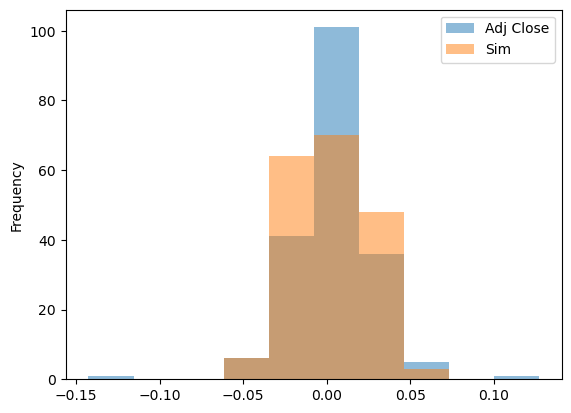

In [16]:
simulacion = np.random.normal(R.mean(), R.std(), R.count())

R = R.dropna()
tabla = pd.DataFrame(R)
tabla["Sim"] = simulacion
tabla.plot.hist(alpha=0.5)

In [17]:
def sim_R (media, std, fecha_inicio, dias, N):
    R_sim = np.random.normal(media, std, size=(dias, N))
    fechas = pd.date_range(start = fecha_inicio, periods=dias)
    return pd.DataFrame(index=fechas, data=R_sim)
sim_R(R.mean(), R.std(), "2023-10-16", 5, 10)

,0,1,2,3,4,5,6,7,8,9
2023-10-16,-0.000634,0.012432,0.026263,-0.037551,0.001576,0.002541,0.010747,0.010235,0.001949,0.024443
2023-10-17,-0.039474,-0.001093,0.006844,0.045075,-0.004748,-0.014494,-0.027990,0.026247,0.039566,-0.006562
2023-10-18,-0.043124,-0.008197,-0.032725,0.000341,0.004572,0.020665,0.049571,-0.027337,-0.006215,-0.022336
2023-10-19,-0.000664,0.022464,-0.012311,-0.001814,0.019397,0.000216,-0.001272,0.016460,0.029202,-0.013621
2023-10-20,0.016223,0.009693,0.033423,-0.014738,0.001558,-0.016152,-0.000214,-0.012754,-0.027777,-0.020877


## Simulación de 1000 días

In [19]:
sim = sim_R(R.mean(), R.std(), "2023-10-16", 50, 1000)
sim

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-16,-0.018633,0.027468,0.020607,0.016427,0.005426,0.009784,0.039978,-0.012469,-0.018150,-0.015636,...,0.024602,0.037003,-0.007757,-0.000548,0.010336,0.000986,0.039309,0.017457,0.015352,0.004799
2023-10-17,0.025576,0.003115,0.002132,-0.014196,0.016792,-0.029578,0.023029,-0.020050,-0.003425,0.010555,...,0.034293,0.005458,0.005914,0.038407,-0.000188,0.010166,0.020901,0.018994,0.003987,0.025371
2023-10-18,0.021885,0.004194,-0.037600,0.008721,0.015080,0.053222,0.016339,0.007745,0.005435,-0.060598,...,0.013439,0.013058,0.000471,-0.034409,-0.003706,-0.018188,0.039050,-0.010015,-0.004292,-0.021143
2023-10-19,0.006854,-0.037357,0.023543,-0.018754,-0.000550,-0.030106,0.017482,0.015319,0.038281,0.010795,...,-0.049062,0.023710,0.023005,0.014495,0.015029,-0.001769,-0.037727,0.059166,-0.042197,0.009931
2023-10-20,-0.000536,0.004108,-0.011980,-0.015478,0.031763,0.013056,-0.005931,0.003235,-0.003703,-0.001331,...,0.044528,0.019061,-0.014394,0.001257,0.007027,0.017135,-0.010118,-0.039914,0.012952,0.051045
2023-10-21,-0.035669,0.012946,0.007337,0.043691,0.005752,0.049253,0.005594,0.012764,0.005258,0.004931,...,0.031098,0.005657,0.041273,-0.033105,0.028808,0.014778,0.024522,-0.008791,0.011587,0.030816
2023-10-22,-0.053626,0.006297,0.044414,0.044754,-0.005712,0.027638,-0.021249,0.034907,-0.031765,0.003545,...,0.016371,-0.009947,0.047216,0.054345,-0.004279,0.023262,0.000844,0.041721,-0.025698,-0.000221
2023-10-23,0.058099,0.008875,0.028438,-0.008033,0.009197,-0.007389,0.019617,-0.038277,0.032640,0.034227,...,-0.039243,-0.031256,0.007828,0.030394,0.004397,0.064258,-0.028572,0.000325,0.024134,0.031428
2023-10-24,0.003559,0.017075,0.040690,-0.008843,0.011664,-0.014613,0.023365,-0.075108,-0.008831,-0.004840,...,0.021392,0.020662,-0.007173,0.017015,-0.012437,-0.019876,0.035786,-0.055672,-0.034010,0.054369
2023-10-25,-0.008947,-0.026144,-0.030165,0.005038,0.013030,0.005226,0.005436,0.019049,-0.009044,0.025334,...,0.020685,0.007550,0.034054,0.007998,0.021064,-0.002672,-0.010184,-0.014065,0.009880,-0.013792


In [20]:
(1+sim)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-16,0.981367,1.027468,1.020607,1.016427,1.005426,1.009784,1.039978,0.987531,0.981850,0.984364,...,1.024602,1.037003,0.992243,0.999452,1.010336,1.000986,1.039309,1.017457,1.015352,1.004799
2023-10-17,1.025576,1.003115,1.002132,0.985804,1.016792,0.970422,1.023029,0.979950,0.996575,1.010555,...,1.034293,1.005458,1.005914,1.038407,0.999812,1.010166,1.020901,1.018994,1.003987,1.025371
2023-10-18,1.021885,1.004194,0.962400,1.008721,1.015080,1.053222,1.016339,1.007745,1.005435,0.939402,...,1.013439,1.013058,1.000471,0.965591,0.996294,0.981812,1.039050,0.989985,0.995708,0.978857
2023-10-19,1.006854,0.962643,1.023543,0.981246,0.999450,0.969894,1.017482,1.015319,1.038281,1.010795,...,0.950938,1.023710,1.023005,1.014495,1.015029,0.998231,0.962273,1.059166,0.957803,1.009931
2023-10-20,0.999464,1.004108,0.988020,0.984522,1.031763,1.013056,0.994069,1.003235,0.996297,0.998669,...,1.044528,1.019061,0.985606,1.001257,1.007027,1.017135,0.989882,0.960086,1.012952,1.051045
2023-10-21,0.964331,1.012946,1.007337,1.043691,1.005752,1.049253,1.005594,1.012764,1.005258,1.004931,...,1.031098,1.005657,1.041273,0.966895,1.028808,1.014778,1.024522,0.991209,1.011587,1.030816
2023-10-22,0.946374,1.006297,1.044414,1.044754,0.994288,1.027638,0.978751,1.034907,0.968235,1.003545,...,1.016371,0.990053,1.047216,1.054345,0.995721,1.023262,1.000844,1.041721,0.974302,0.999779
2023-10-23,1.058099,1.008875,1.028438,0.991967,1.009197,0.992611,1.019617,0.961723,1.032640,1.034227,...,0.960757,0.968744,1.007828,1.030394,1.004397,1.064258,0.971428,1.000325,1.024134,1.031428
2023-10-24,1.003559,1.017075,1.040690,0.991157,1.011664,0.985387,1.023365,0.924892,0.991169,0.995160,...,1.021392,1.020662,0.992827,1.017015,0.987563,0.980124,1.035786,0.944328,0.965990,1.054369
2023-10-25,0.991053,0.973856,0.969835,1.005038,1.013030,1.005226,1.005436,1.019049,0.990956,1.025334,...,1.020685,1.007550,1.034054,1.007998,1.021064,0.997328,0.989816,0.985935,1.009880,0.986208


In [21]:
(1+sim).cumprod()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-16,0.981367,1.027468,1.020607,1.016427,1.005426,1.009784,1.039978,0.987531,0.981850,0.984364,...,1.024602,1.037003,0.992243,0.999452,1.010336,1.000986,1.039309,1.017457,1.015352,1.004799
2023-10-17,1.006466,1.030669,1.022783,1.001998,1.022310,0.979916,1.063927,0.967731,0.978487,0.994754,...,1.059739,1.042663,0.998112,1.037838,1.010146,1.011163,1.061032,1.036783,1.019400,1.030292
2023-10-18,1.028492,1.034991,0.984326,1.010736,1.037726,1.032070,1.081310,0.975225,0.983805,0.934474,...,1.073981,1.056277,0.998582,1.002126,1.006403,0.992771,1.102466,1.026400,1.015025,1.008508
2023-10-19,1.035542,0.996327,1.007501,0.991782,1.037155,1.000998,1.100213,0.990164,1.021466,0.944562,...,1.021289,1.081322,1.021554,1.016652,1.021528,0.991015,1.060873,1.087129,0.972194,1.018524
2023-10-20,1.034987,1.000420,0.995430,0.976431,1.070099,1.014067,1.093687,0.993368,1.017683,0.943304,...,1.066765,1.101933,1.006850,1.017930,1.028707,1.007996,1.050139,1.043737,0.984786,1.070514
2023-10-21,0.998070,1.013372,1.002734,1.019092,1.076254,1.064013,1.099806,1.006048,1.023034,0.947956,...,1.099938,1.108167,1.048406,0.984232,1.058342,1.022892,1.075890,1.034562,0.996197,1.103503
2023-10-22,0.944548,1.019753,1.047269,1.064701,1.070107,1.093420,1.076436,1.041166,0.990538,0.951316,...,1.117946,1.097144,1.097908,1.037720,1.053813,1.046687,1.076798,1.077725,0.970596,1.103259
2023-10-23,0.999424,1.028804,1.077051,1.056148,1.079949,1.085341,1.097552,1.001313,1.022869,0.983877,...,1.074074,1.062852,1.106503,1.069261,1.058447,1.113944,1.046032,1.078075,0.994021,1.137932
2023-10-24,1.002981,1.046371,1.120877,1.046809,1.092545,1.069481,1.123197,0.926106,1.013836,0.979115,...,1.097050,1.084813,1.098565,1.087454,1.045283,1.091803,1.083466,1.018056,0.960214,1.199800
2023-10-25,0.994008,1.019014,1.087066,1.052083,1.106781,1.075069,1.129302,0.943748,1.004667,1.003920,...,1.119743,1.093003,1.135976,1.096151,1.067301,1.088886,1.072432,1.003737,0.969701,1.183252


In [22]:
precios_simulados = (1+sim).cumprod()*data[-1]
precios_simulados

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2023-10-16,157.538872,164.939411,163.838021,163.167085,161.401083,162.100605,166.947623,158.528361,157.616303,158.019977,...,164.479298,166.470014,159.284847,160.441983,162.189178,160.688320,166.840328,163.332401,162.994459,161.300460
2023-10-17,161.568020,165.453239,164.187380,160.850805,164.111408,157.305936,170.792183,155.349810,157.076537,159.687845,...,170.119834,167.378615,160.226848,166.604077,162.158726,162.321941,170.327467,166.434788,163.644331,165.392762
2023-10-18,165.103865,166.147139,158.013899,162.253517,166.586203,165.678148,173.582724,156.552925,157.930293,150.011114,...,172.406095,169.564182,160.302321,160.871336,161.557812,159.369568,176.978820,164.768025,162.941937,161.895825
2023-10-19,166.235544,159.940397,161.734087,159.210694,166.494521,160.690198,176.617226,158.951091,163.975944,151.630507,...,163.947508,173.584539,163.990123,163.203145,163.985917,159.087689,170.301870,174.516755,156.066290,163.503583
2023-10-20,166.146501,160.597499,159.796456,156.746410,171.782951,162.788133,175.569631,159.465344,163.368720,151.428627,...,171.247719,176.893309,161.629621,163.408311,165.138292,161.813658,168.578735,167.551120,158.087735,171.849630
2023-10-21,160.220221,162.676663,160.968864,163.594887,172.771098,170.805928,176.551814,161.500827,164.227646,152.175328,...,176.573101,177.894029,168.300635,157.998732,169.895663,164.204866,172.712621,166.078239,159.919486,177.145300
2023-10-22,151.628230,163.700987,168.118141,170.916381,171.784242,175.526699,172.800237,167.138309,159.011032,152.714766,...,179.463830,176.124567,176.247189,166.585183,169.168662,168.024599,172.858376,173.007115,155.809826,177.106168
2023-10-23,160.437613,165.153899,172.899051,169.543446,173.364180,174.229762,176.190087,160.740736,164.201150,157.941776,...,172.421059,170.619660,177.626848,171.648390,169.912511,178.821460,167.919540,173.063351,159.570162,182.672198
2023-10-24,161.008615,167.973895,179.934370,168.044254,175.386243,171.683739,180.306793,148.667823,162.751031,157.177346,...,176.109474,174.145035,176.352688,174.569025,167.799301,175.267170,173.928769,163.428498,154.143165,192.603921
2023-10-25,159.568037,163.582389,174.506648,168.890891,177.671597,172.580899,181.286891,151.499845,161.279127,161.159347,...,179.752360,175.459789,182.358186,175.965168,171.333883,174.798888,172.157559,161.129918,155.666148,189.947449


## Probabilidad Precio-Umbral

In [23]:
valor_deseado = data[-1] * 1.03
data[-1], valor_deseado

(160.52999877929688, 165.3458987426758)

<Axes: >

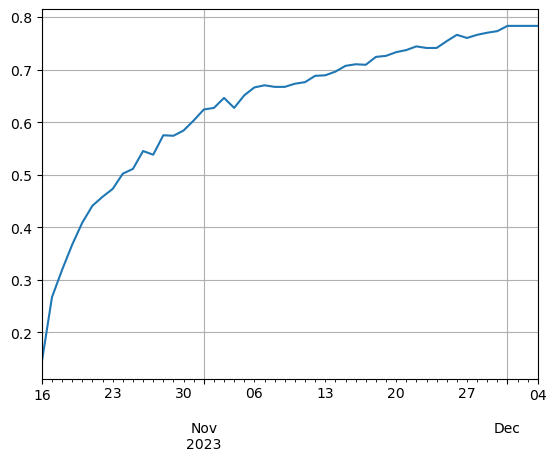

In [24]:
sobrepasa = valor_deseado<= precios_simulados
probabilidad = sobrepasa.mean(axis=1)
probabilidad.plot(grid=True)

[*********************100%%**********************]  4 of 4 completed


<Axes: ylabel='Frequency'>

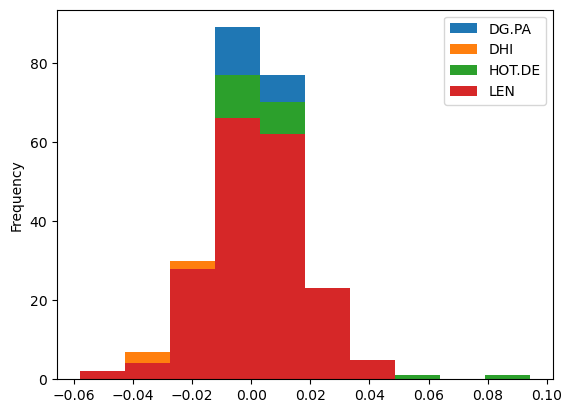

In [25]:
data = getClose(["DG.PA", "DHI", "HOT.DE", "LEN"], "2023-01-01", "2023-10-15")
R = (data-data.shift())/data.shift()
R.plot.hist()

In [33]:
sim_dgpa = sim_R(R["DG.PA"].mean(), R["DG.PA"].std(), "2023-10-16", 100, 1000)
sim_dhi = sim_R(R["DHI"].mean(), R["DHI"].std(), "2023-10-16", 100, 1000)
sim_hotde = sim_R(R["HOT.DE"].mean(), R["HOT.DE"].std(), "2023-10-16", 100, 1000)
sim_len = sim_R(R["LEN"].mean(), R["LEN"].std(), "2023-10-16", 100, 1000)

In [34]:
sim_precios_dgpa = data["DG.PA"][-1]*(1+sim_dgpa).cumprod()
sim_precios_dhi = data["DHI"][-1]*(1+sim_dhi).cumprod()
sim_precios_hotde = data["HOT.DE"][-1]*(1+sim_hotde).cumprod()
sim_precios_len = data["LEN"][-1]*(1+sim_len).cumprod()

In [35]:
porcentaje = 1.05
valor_deseado_dgpa = data["DG.PA"][-1]*porcentaje
valor_deseado_dhi = data["DHI"][-1]*porcentaje
valor_deseado_hotde = data["HOT.DE"][-1]*porcentaje
valor_deseado_len = data["LEN"][-1]*porcentaje

In [36]:
sobrepasa_dgpa=valor_deseado_dgpa <= sim_precios_dgpa
sobrepasa_dhi=valor_deseado_dhi <= sim_precios_dhi
sobrepasa_hotde=valor_deseado_hotde <= sim_precios_hotde
sobrepasa_len=valor_deseado_len <= sim_precios_len

In [37]:
probabilidad_dgpa = sobrepasa_dgpa.mean(axis=1)
probabilidad_dhi = sobrepasa_dhi.mean(axis=1)
probabilidad_hotde = sobrepasa_hotde.mean(axis=1)
probabilidad_len = sobrepasa_len.mean(axis=1)

<Axes: >

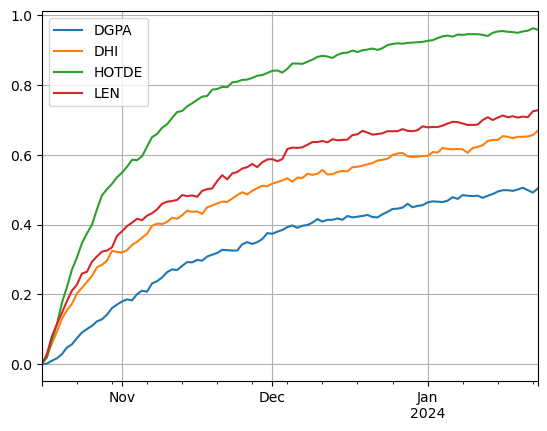

In [41]:
tabla = pd.DataFrame(index=probabilidad_dgpa.index)
tabla["DGPA"] = probabilidad_dgpa
tabla["DHI"] = probabilidad_dhi
tabla["HOTDE"] = probabilidad_hotde
tabla["LEN"] = probabilidad_len
tabla.plot(grid=True)

In [42]:
R.describe()

,DG.PA,DHI,HOT.DE,LEN
count,195.000000,190.000000,190.000000,190.000000
mean,0.000627,0.001281,0.003315,0.001514
std,0.011146,0.016984,0.014887,0.016199
min,-0.043527,-0.058158,-0.030441,-0.050844
25%,-0.005693,-0.009752,-0.006107,-0.008237
50%,0.000929,0.002918,0.002496,0.001547
75%,0.007549,0.012282,0.010531,0.010547
max,0.029501,0.056352,0.094512,0.044096


<Axes: xlabel='Date'>

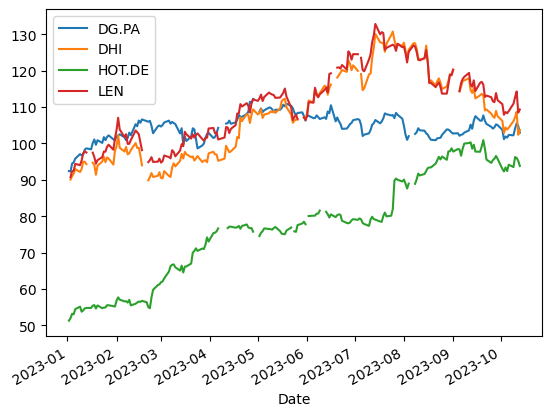

In [43]:
data.plot()

## Conclusiones
La solución incluye la obtención de los valores óptimos de X e Y, así como el cálculo del costo total óptimo. Esta solución factible permite a la empresa tomar decisiones informadas sobre cómo asignar recursos de manera eficiente, reducir costos de producción y cumplir con sus objetivos financieros.


En conclusión, el enfoque principal del proyecto fue reducir los costos de producción en la empresa de soluciones de herrería y esto implica encontrar formas más eficientes de gestionar los recursos, como materiales y mano de obra, para ejecutar proyectos de herrería. 


A través de un modelo matemático, hemos ilustrado cómo la asignación eficiente de recursos bajo restricciones de IVA y ganancia total puede conducir a una mejora significativa en la eficiencia y rentabilidad de la producción.
Esta optimización tuvo como objetivo hacer que la empresa sea más eficiente, competitiva y rentable en su industria de herrería.

# Referencias
CIMTRA. (22 de Diciembre de 2020). CIMTRA. Obtenido de http://cimtrajalisco.org/iteso/